In [1]:
import numpy as np
from tensorflow import keras
import utils

In [2]:
history_steps = 50
forecast_steps = 10
series = utils.generate_time_series(10000, history_steps + forecast_steps)
x_train, y_train = series[:7000, :history_steps], series[:7000, -forecast_steps:]
x_val, y_val = series[7000:9000, :history_steps], series[7000:9000, -forecast_steps:]
x_test, y_test = series[9000:, :history_steps], series[9000:, -forecast_steps:]

print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_val.shape = {x_val.shape}, y_val.shape = {y_val.shape}")
print(f"x_test.shape = {x_test.shape}, y_test.shape = {y_test.shape}")

x_train.shape = (7000, 50), y_train.shape = (7000, 10)
x_val.shape = (2000, 50), y_val.shape = (2000, 10)
x_test.shape = (1000, 50), y_test.shape = (1000, 10)


In [3]:
utils.reset_session()

model = keras.models.Sequential([
    keras.layers.Dense(10, input_shape=[50])
])

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
219/219 [==============================] - 0s 973us/step - loss: 0.1343 - mae: 0.2839 - val_loss: 0.0606 - val_mae: 0.1976
Epoch 2/20
219/219 [==============================] - 0s 639us/step - loss: 0.0496 - mae: 0.1789 - val_loss: 0.0425 - val_mae: 0.1661
Epoch 3/20
219/219 [==============================] - 0s 642us/step - loss: 0.0385 - mae: 0.1572 - val_loss: 0.0353 - val_mae: 0.1508
Epoch 4/20
219/219 [==============================] - 0s 658us/step - loss: 0.0331 - mae: 0.1456 - val_loss: 0.0311 - val_mae: 0.1412
Epoch 5/20
219/219 [==============================] - 0s 653us/step - loss: 0.0298 - mae: 0.1375 - val_loss: 0.0283 - val_mae: 0.1340
Epoch 6/20
219/219 [==============================] - 0s 640us/step - loss: 0.0273 - mae: 0.1312 - val_loss: 0.0264 - val_mae: 0.1289
Epoch 7/20
219/219 [==============================] - 0s 662us/step - loss: 0.0256 - mae: 0.1266 - val_loss: 0.0249 - val_mae: 0.1246
Epoch 8/20
219/219 [==============================] - 0s 671us

In [4]:
series = utils.generate_time_series(1, history_steps + forecast_steps, seed=43)
print(f"series.shape = {series.shape}")
x_new, y_new = series[:, :history_steps], series[:, -forecast_steps:]
print(f"x_new.shape = {x_new.shape}, y_new.shape = {y_new.shape}")

series.shape = (1, 60)
x_new.shape = (1, 50), y_new.shape = (1, 10)


In [5]:
y_pred = model.predict(x_new)
y_pred.shape

(1, 10)

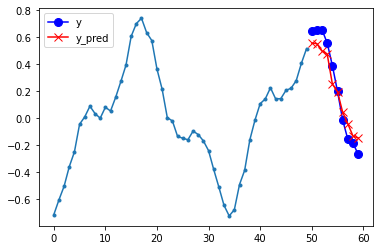

In [6]:
utils.plot_series_multiple_forecasts(x_new, y_new, y_pred)